<a href="https://colab.research.google.com/github/nguyenhau442001/Homework_AI/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                         

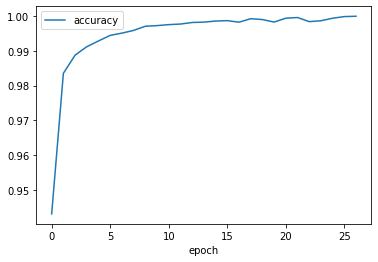

Test error: 0.03462718054652214
Test accuracy:  0.9929999709129333


In [2]:
from keras.datasets import mnist
from sklearn import utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop,Adam
import numpy as np
from keras.utils import np_utils
import pandas as pd
from keras.callbacks import EarlyStopping 
import matplotlib.pyplot as plt

# Load data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# Force to data type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
# Divide in 255 to ensure value always between 0 and 1
x_train/=255
x_test/=255

# Convert labels to one hot-encoding
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)


# Create model 
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),input_shape=(28,28),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# Compile
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Training
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_data=(x_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=20)])
# Plot
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.show()

# Evaluate
score = model.evaluate(x_test, y_test, verbose=0)
print('Test error:',score[0])
print('Test accuracy: ',score[1])




In [6]:
# Predict
n=int(input("Index ? "))
print(x_test.shape)

y_predict = model.predict(x_test[n].reshape(1,28,28,1))
print('Predicted value: ', np.argmax(y_predict))
print('Correct value: ',np.argmax(y_test[n]))



Index ? 10
(10000, 28, 28, 1)
Predicted value:  0
Correct value:  0


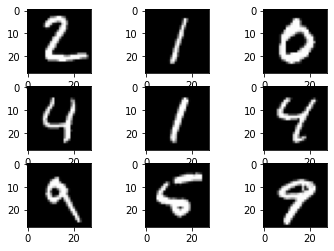

In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
(x_tr,y_tr),(x_t,y_t)=mnist.load_data()
for i in range(1,10):
  plt.subplot(330+i)
  plt.imshow(x_t[i],cmap='gray')
